In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import tree

Matplotlib is building the font cache; this may take a moment.


In [6]:
df = pd.read_csv("car_evaluation.csv")

In [11]:
df.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


In [15]:
label_encoders = {}
for column in df.columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [17]:
X = df.drop('class', axis=1)
y = df['class']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [21]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


DecisionTreeClassifier(random_state=42)

In [23]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [25]:
print(f"Akurasi Model: {accuracy:.4f}\n")
print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(conf_matrix)

Akurasi Model: 0.9711

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95        77
           1       0.75      0.80      0.77        15
           2       1.00      1.00      1.00       237
           3       0.83      0.88      0.86        17

    accuracy                           0.97       346
   macro avg       0.89      0.91      0.90       346
weighted avg       0.97      0.97      0.97       346

Confusion Matrix:
[[ 73   2   0   2]
 [  2  12   0   1]
 [  1   0 236   0]
 [  0   2   0  15]]


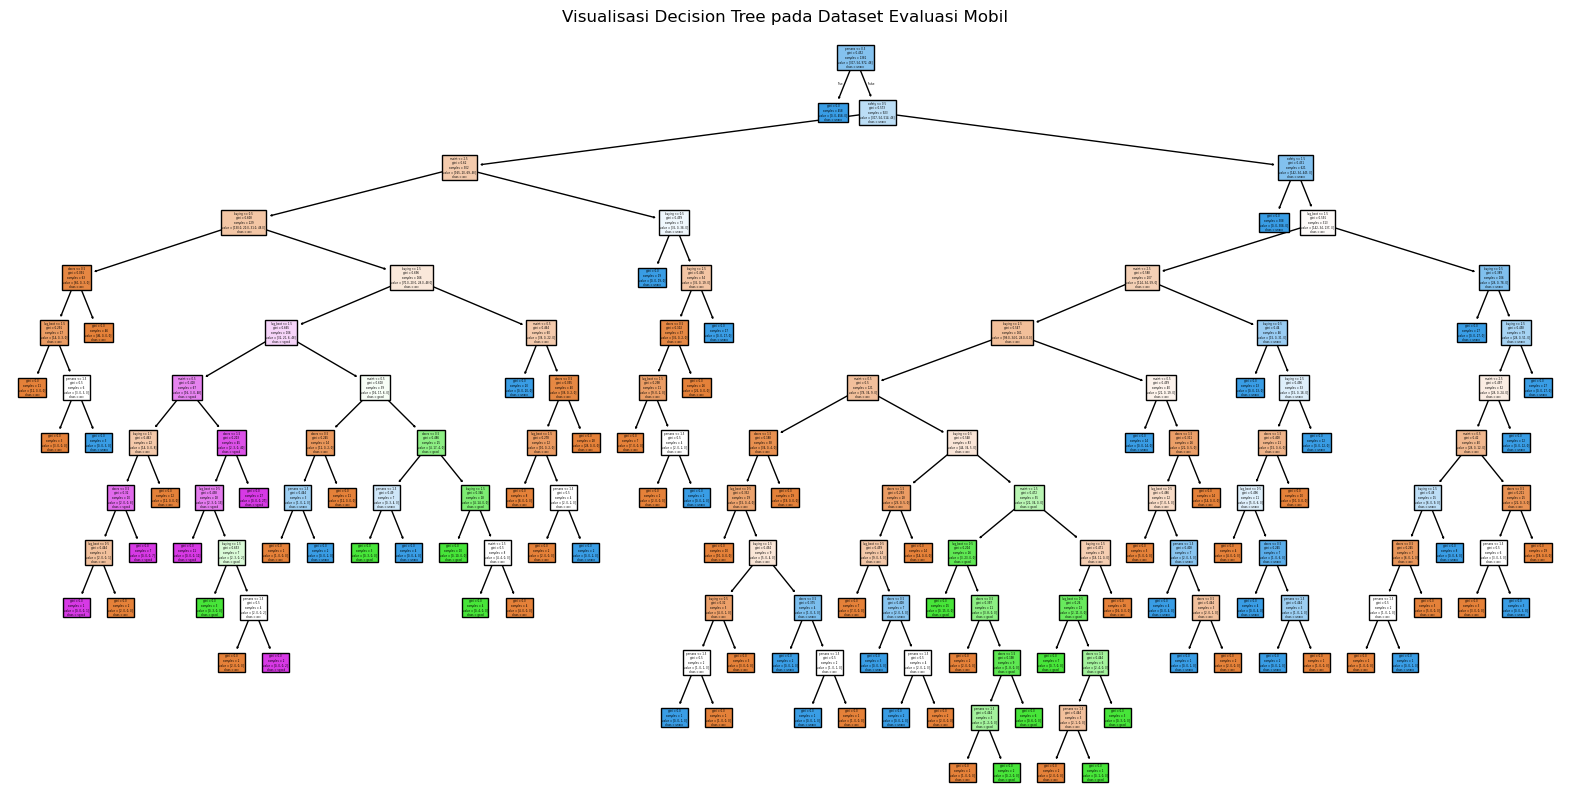

In [28]:
plt.figure(figsize=(20, 10))
tree.plot_tree(clf, feature_names=X.columns, class_names=label_encoders['class'].classes_, filled=True)
plt.title("Visualisasi Decision Tree pada Dataset Evaluasi Mobil")
plt.savefig("decision_tree_visualization.png")
plt.show()